In [ ]:
#Sutan Tadese
#suttad3416
#August 2025
#project

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yoshifumimiya/6-ovarian-cancer-datasets")

print("Path to dataset files:", path)

100%|██████████| 228M/228M [00:08<00:00, 27.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yoshifumimiya/6-ovarian-cancer-datasets/versions/14


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
!pip install shap
import shap

In [ ]:
import os
print("Files in dataset folder:")
for f in os.listdir(path):
    print(f)
#getting the foiles

In [ ]:
import pandas as pd
import os
# Loading all CSV files
datasets = {}
for file in os.listdir(path):
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        datasets[file] = pd.read_csv(file_path)
        print(f"{file}: {datasets[file].shape}")

datasets['GSE38666.csv'].head()

GSE8841.csv: (4657, 82)
merged_datagroupbatch.csv: (11478, 595)


/tmp/ipython-input-3378397041.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

GSE9891.csv: (44493, 286)


/tmp/ipython-input-3378397041.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets[file] = pd.read_csv(file_path)


GSE18520.csv: (44541, 64)
multiclass_merged_datagroupbatch.csv: (3842, 593)


/tmp/ipython-input-3378397041.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets[file] = pd.read_csv(file_path)


GSE66957.csv: (41025, 70)
endometrioid_after_pyComBat.csv: (109, 3051)
Multi_group_batch.csv: (502, 11479)


/tmp/ipython-input-3378397041.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets[file] = pd.read_csv(file_path)


GSE38666.csv: (44541, 46)
Filtering_pyComBat.csv: (594, 4182)
Sero_vs_Ctrl.csv: (13081, 129)
GSE69428.csv: (29327, 30)
GSE6008.csv: (21046, 104)
gene_length.csv: (60606, 2)
endometrioid_after_pyComBat_2.csv: (3049, 110)


/tmp/ipython-input-3378397041.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets[file] = pd.read_csv(file_path)


,GENE,GSM947269,GSM947270,GSM947271,GSM947272,GSM947273,GSM947274,GSM947275,GSM947276,GSM947277,...,GSM947304,GSM947305,GSM947306,GSM947307,GSM947308,GSM947309,GSM947310,GSM947311,GSM947312,GSM947313
0,group,control,control,control,control,control,control,control,control,control,...,case,case,case,case,case,case,case,case,case,case
1,DDR1,2187.69,2187.14,1725.46,2803.77,2110.73,2038.88,2615.51,2333.46,3971.69,...,4681.61,4536.33,4778.76,4283.87,7118.63,2866.91,5211.56,2923.21,3293.34,7102.05
2,RFC2,184.566,79.4375,113.491,148.339,258.928,122.337,22.2736,23.316,318.88,...,76.2609,103.614,219.411,316.532,294.889,411.915,243.712,198.586,43.0744,250.801
3,HSPA6,141.942,30.9578,41.6206,174.754,112.031,72.6337,75.8106,52.1619,29.935,...,92.3987,398.467,513.737,49.3012,474.544,33.0496,103.512,291.249,245,286.766
4,PAX8,534.718,1135.3,881.207,1102.1,773.546,714.296,699.72,753.648,747.052,...,7982.88,6002.3,5353.05,6829.25,10355.3,5891.46,5703.13,5318.15,8958.73,9541.79


In [ ]:
file_path = os.path.join(path, 'multiclass_merged_datagroupbatch.csv')
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
print(df.head())
#loading my specfic dataset

Dataset shape: (3842, 593)
      GENE  GSM139377  GSM139378  GSM139379  GSM139380  GSM139381  GSM139382  \
0      A2M   3.648848   3.651278   3.790285   3.537945   3.438542   3.672283   
1    AADAC   2.227887   2.576341   2.506505   2.472756   2.488551   2.528917   
2    ABCA1   9.207103   9.065755   9.631375   8.815240   9.503053   9.134644   
3  ABCA11P   2.539076   2.385606   2.363612   2.559907   2.387390   2.378398   
4    ABCA2   6.700280   7.095093   6.961948   6.729999   7.013099   7.217931   

   GSM139383  GSM139384  GSM139385  ...  GSM1701044  GSM1701045  GSM1701046  \
0   3.949097   3.524136   3.468347  ...    13.77231     7.38732     8.15349   
1   2.896526   2.648360   2.729165  ...     3.03850     5.34572     5.35880   
2   8.902275   9.452715   8.995071  ...    14.38736    19.35697    19.36788   
3   2.212188   2.330414   2.380211  ...     4.97126     4.35547     4.30266   
4   6.922487   6.934246   7.054510  ...    13.62382    13.20676    12.90235   

   GSM1701047  GS

In [ ]:
#analysus
print("\nSummary Statistics:")
print(df.describe())

numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns



Summary Statistics:
         GSM139377    GSM139378    GSM139379    GSM139380    GSM139381  \
count  3842.000000  3842.000000  3842.000000  3842.000000  3842.000000   
mean      4.932537     4.937739     4.935128     4.910417     4.924266   
std       3.336358     3.349156     3.321962     3.279428     3.279943   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.705861     2.683947     2.695482     2.713491     2.708421   
50%       3.456214     3.469158     3.459995     3.446455     3.462023   
75%       6.123054     6.152115     6.155967     6.156895     6.135357   
max      36.170862    35.967807    36.874987    36.155762    35.992225   

         GSM139382    GSM139383    GSM139384    GSM139385    GSM139386  ...  \
count  3842.000000  3842.000000  3842.000000  3842.000000  3842.000000  ...   
mean      4.926426     4.942509     4.934289     4.915019     4.940346  ...   
std       3.279301     3.322884     3.295813     3.279157     3.346853  ...

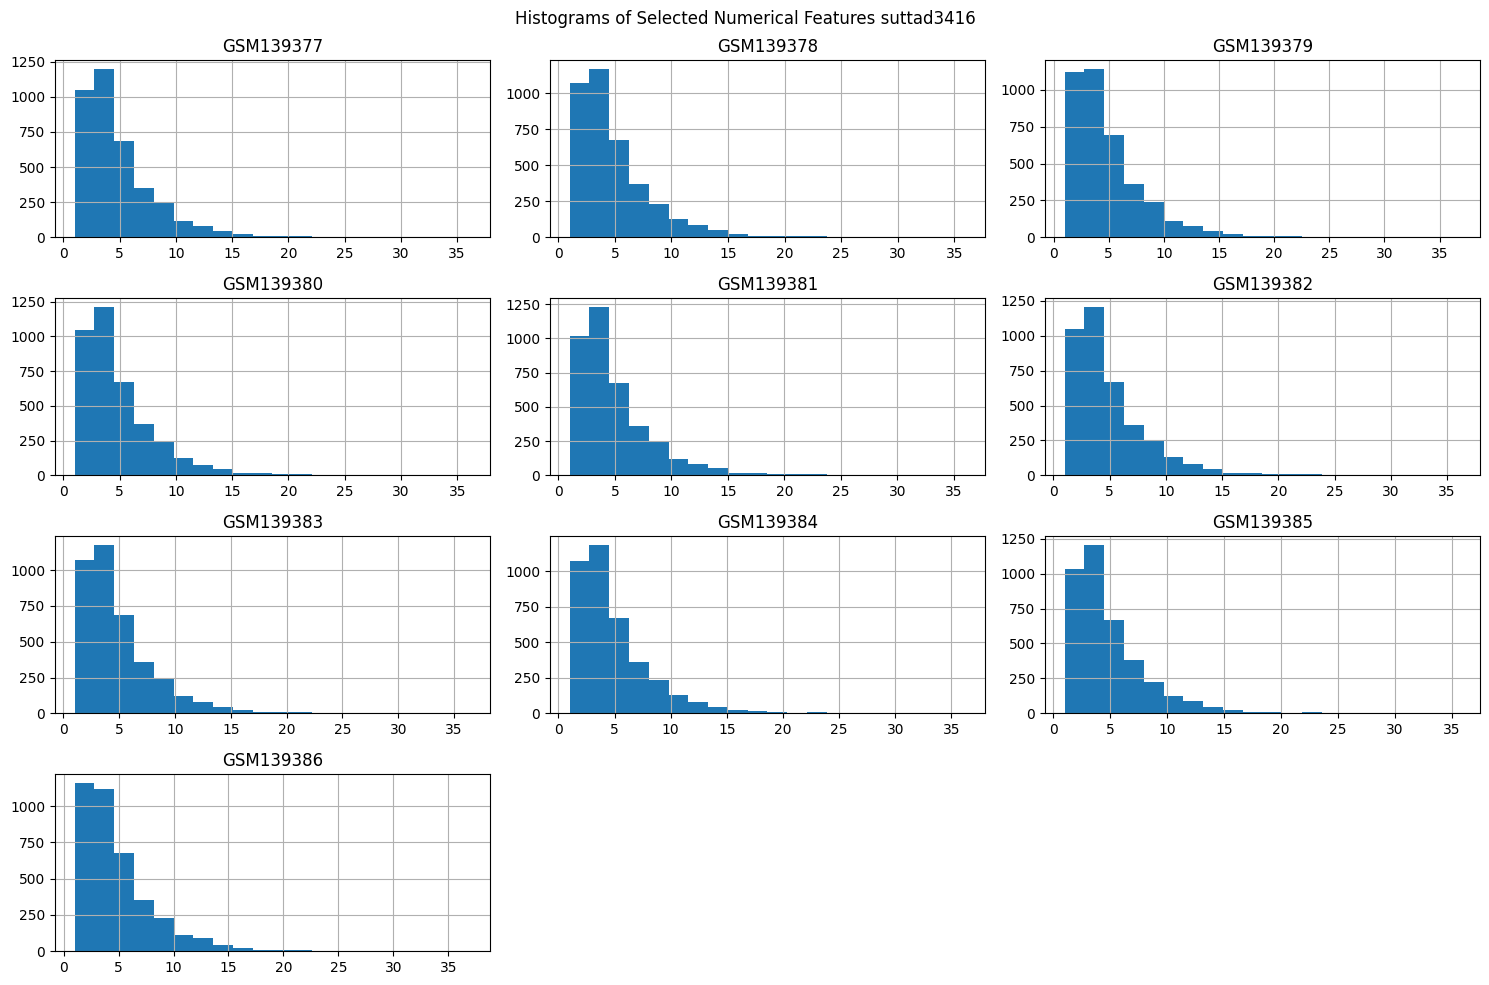

In [ ]:
#plot, hisotogram
num_features_to_plot = numeric_cols[:10]
df[num_features_to_plot].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Selected Numerical Features suttad3416")
plt.tight_layout()
plt.show()

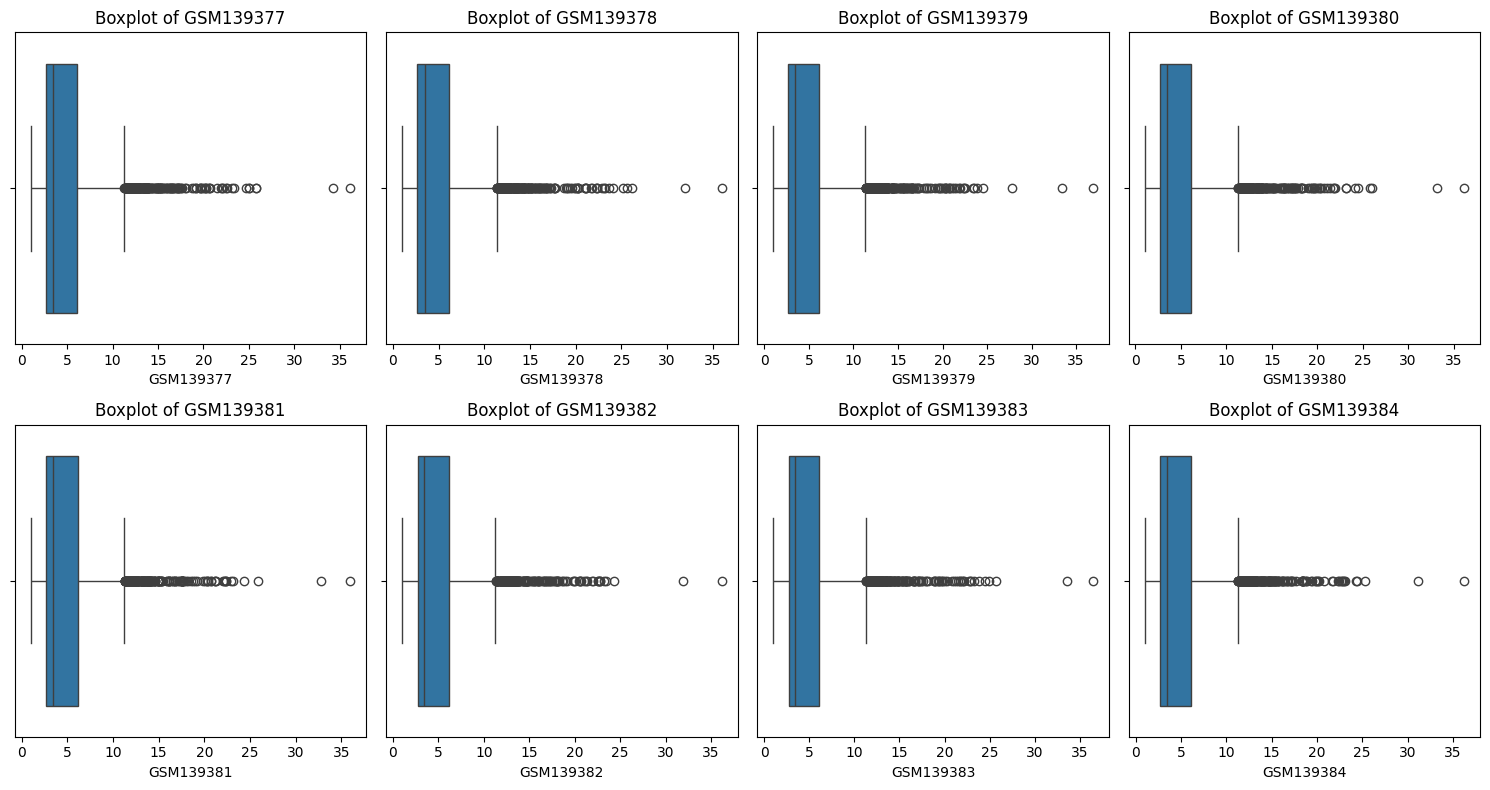

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[:8]):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

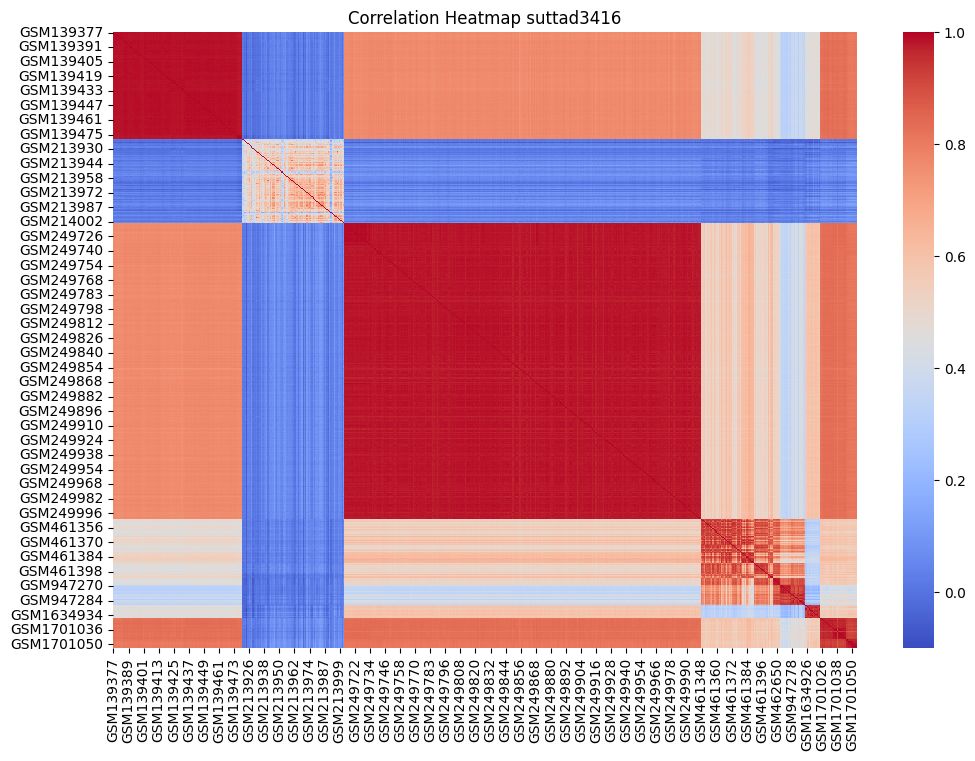

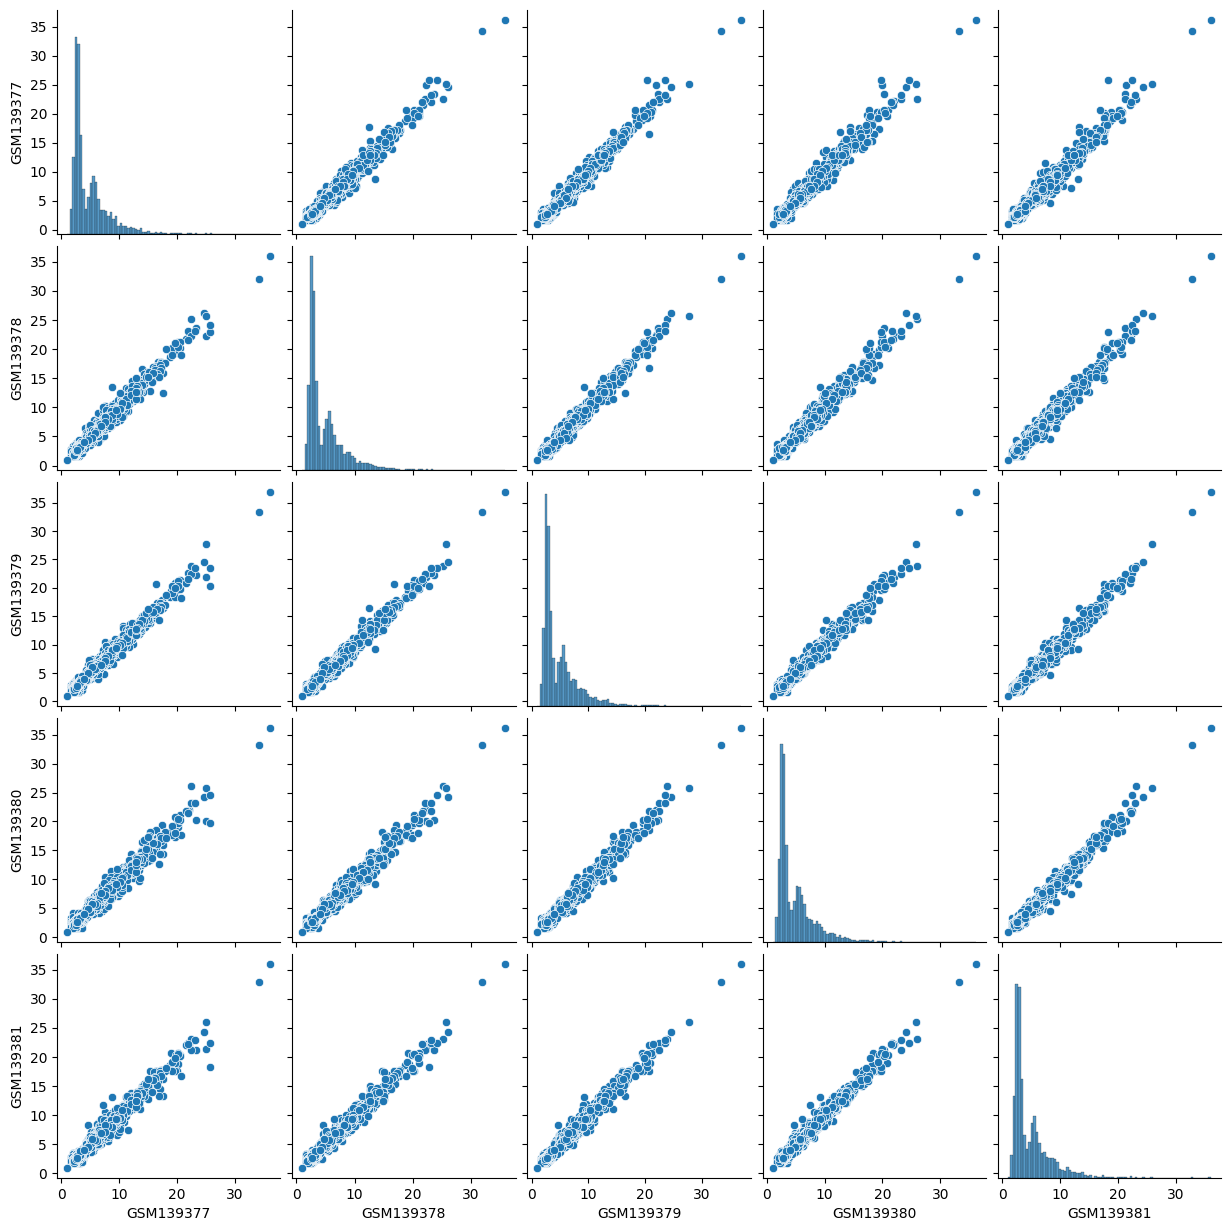

/tmp/ipython-input-3657430540.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-3657430540.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# Correlation Matrix
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=False, cmap='coolwarm')
    plt.title('Correlation Heatmap suttad3416')
    plt.show()
    # Pairplot
    sns.pairplot(df[numeric_cols[:5]])
    plt.show()

# Data Preprocessing
def preprocess_missing(data):
    for col in data.columns:
        if data[col].dtype in [np.float64, np.int64]:
            data[col].fillna(data[col].mean(), inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)
    return data

df = preprocess_missing(df)

In [ ]:
# Standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#  encoding for categorical features
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
    df_preprocessed = pd.concat([df_scaled, encoded_df], axis=1)

In [21]:
## week 3 and week4

In [7]:
import kagglehub
path = kagglehub.dataset_download("yoshifumimiya/6-ovarian-cancer-datasets")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/6-ovarian-cancer-datasets


In [2]:
import os
print(os.listdir("/kaggle/input"))


['6-ovarian-cancer-datasets']


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

file_path = "/kaggle/input/6-ovarian-cancer-datasets/Multi_group_batch.csv"

# loading
df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)
print(df.head())

# features (X) and labels (y)
if "group" in df.columns:
    y_labels = df["group"]
    X = df.drop(columns=["group", "Unnamed: 0"], errors="ignore")
else:
    df = df.set_index("GENE")
    y_labels = df.loc["group"].T
    X = df.drop(index="group").T

X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# encoding   into numbers
le = LabelEncoder()
y = le.fit_transform(y_labels.astype(str))
print("Classes:", list(le.classes_))

# spiliting  into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Dataset shape: (502, 11479)
  Unnamed: 0        A1CF          A2M     A4GALT      A4GNT        AAAS  \
0  GSM139476    2.819544     3.562174   2.534026   2.631444    2.797268   
1  GSM139477    2.861534     3.622835   2.350248   2.672098    2.674861   
2  GSM139478    2.699838     3.786467   2.301030   2.547775    2.870404   
3  GSM139479    2.718502     3.993172   2.480007   2.563481    2.684845   
4  GSM462643  200.121900  3726.395000  47.534000  58.276900  600.338000   

         AACS       AADAC       AAGAB         AAK1  ...        ZW10  \
0    2.816904    2.408240    5.277213    11.887680  ...    3.008600   
1    2.844477    2.482874    4.624365    12.182425  ...    3.086716   
2    2.879096    2.383815    4.870615    11.943733  ...    3.043755   
3    2.806858    2.593286    5.134464    12.227234  ...    3.055760   
4  181.822000  296.197000  604.836000  2628.952100  ...  380.770000   

       ZWILCH       ZWINT        ZXDB         ZXDC         ZYX       ZZEF1  \
0    2.683947   

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Regression model
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

#  baseline
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Baseline Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Baseline Model Performance:
Accuracy: 0.9603960396039604
Precision: 0.960656591974987
Recall: 0.9603960396039604
F1-score: 0.959504294800341


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

file_path = "/kaggle/input/6-ovarian-cancer-datasets/Multi_group_batch.csv"

df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)
print(df.head())

# Features (X) and labels (y)
X = df.drop(columns=["group", "batch", "Unnamed: 0"], errors="ignore")
y = df["group"]

# Trainning /validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encoding
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)

X_train = X_train.to_numpy(dtype="float32")
X_val   = X_val.to_numpy(dtype="float32")

num_classes = len(le.classes_)
input_dim   = X_train.shape[1]

print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Classes:", list(le.classes_))
print("num_classes:", num_classes)
print("input_dim:", input_dim)

Dataset shape: (502, 11479)
  Unnamed: 0        A1CF          A2M     A4GALT      A4GNT        AAAS  \
0  GSM139476    2.819544     3.562174   2.534026   2.631444    2.797268   
1  GSM139477    2.861534     3.622835   2.350248   2.672098    2.674861   
2  GSM139478    2.699838     3.786467   2.301030   2.547775    2.870404   
3  GSM139479    2.718502     3.993172   2.480007   2.563481    2.684845   
4  GSM462643  200.121900  3726.395000  47.534000  58.276900  600.338000   

         AACS       AADAC       AAGAB         AAK1  ...        ZW10  \
0    2.816904    2.408240    5.277213    11.887680  ...    3.008600   
1    2.844477    2.482874    4.624365    12.182425  ...    3.086716   
2    2.879096    2.383815    4.870615    11.943733  ...    3.043755   
3    2.806858    2.593286    5.134464    12.227234  ...    3.055760   
4  181.822000  296.197000  604.836000  2628.952100  ...  380.770000   

       ZWILCH       ZWINT        ZXDB         ZXDC         ZYX       ZZEF1  \
0    2.683947   

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# building  model
model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation="softmax" if num_classes > 2 else "sigmoid")
])
loss = "sparse_categorical_crossentropy" if num_classes > 2 else "binary_crossentropy"

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=["accuracy"]
)
history = model.fit(
    X_train, y_train_enc,
    validation_data=(X_val, y_val_enc),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.4422 - loss: 2337.3911 - val_accuracy: 0.7921 - val_loss: 258.4382
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7273 - loss: 760.4987 - val_accuracy: 0.7921 - val_loss: 283.4257
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6718 - loss: 586.6201 - val_accuracy: 0.7822 - val_loss: 46.3710
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5793 - loss: 226.2417 - val_accuracy: 0.8020 - val_loss: 97.3291
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6992 - loss: 177.3560 - val_accuracy: 0.8020 - val_loss: 36.9509
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6916 - loss: 58.1068 - val_accuracy: 0.1980 - val_loss: 7.6013
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2303 - loss: 19.7593 - val_accuracy: 0.7426 - val_loss: 0.6807
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6039 - loss: 47.6175 - val

In [29]:
# evaluate
results = model.evaluate(X_val, y_val_enc, verbose=0)
print("Validation results:", dict(zip(model.metrics_names, results)))


Validation results: {'loss': 0.9313140511512756, 'compile_metrics': 0.7425742745399475}


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Confusion Matrix:
 [[ 0  0 11  0  0]
 [ 0  0 11  0  0]
 [ 0  0 75  0  0]
 [ 0  0  3  0  0]
 [ 0  0  1  0  0]]


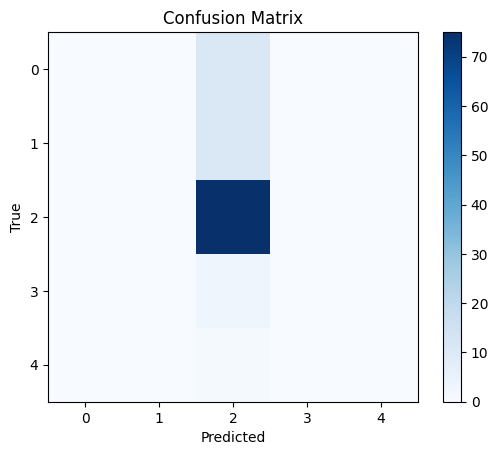


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        11
           2       0.74      1.00      0.85        75
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.74       101
   macro avg       0.15      0.20      0.17       101
weighted avg       0.55      0.74      0.63       101



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# make predictions
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

# confusion matrix
cm = confusion_matrix(y_val_enc, y_pred)
print("Confusion Matrix:\n", cm)

#  confusion matrix
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# displayingprecision/recall/f1
print("\nClassification Report:")
print(classification_report(y_val_enc, y_pred))


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# running PCA
pca = PCA(n_components=10)
pca.fit(X_scaled)

print("Explained variance ratio:", np.round(pca.explained_variance_ratio_, 3))
print("Cumulative variance:", np.round(np.cumsum(pca.explained_variance_ratio_), 3))

# loadings fetures
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print("\nTop features for PC1:")
print(loadings.loc["PC1"].abs().sort_values(ascending=False).head(10))

print("\nTop features for PC2:")
print(loadings.loc["PC2"].abs().sort_values(ascending=False).head(10))

print("\nTop features for PC3:")
print(loadings.loc["PC3"].abs().sort_values(ascending=False).head(10))

Explained variance ratio: [0.675 0.116 0.036 0.025 0.016 0.012 0.009 0.008 0.007 0.006]
Cumulative variance: [0.675 0.791 0.827 0.852 0.868 0.88  0.889 0.898 0.904 0.91 ]

Top features for PC1:
MTMR2      0.011189
CLP1       0.011176
SLC39A9    0.011167
MPZL1      0.011165
PSEN1      0.011163
RABL3      0.011160
RBBP4      0.011114
PI4K2A     0.011114
GON4L      0.011105
FKBP15     0.011098
Name: PC1, dtype: float64

Top features for PC2:
ABCA8     0.019627
ZFPM2     0.018941
TCEAL2    0.018924
ZEB1      0.018717
GNAO1     0.018713
SMCP      0.018702
TLX3      0.018617
F11       0.018574
MRPL28    0.018511
BEX1      0.018488
Name: PC2, dtype: float64

Top features for PC3:
UQCRC1     0.030986
HSPB1      0.029945
LY6E       0.029734
BANF1      0.029655
GPX1       0.029289
VAMP8      0.029167
YIF1A      0.028524
CKS2       0.028087
TMEM147    0.028065
CYC1       0.028029
Name: PC3, dtype: float64


In [34]:
# feature list
feature_names = list(df.drop(columns=["group","batch","Unnamed: 0","Unnamed:0"], errors="ignore").columns)

print("Number of features:", len(feature_names))
print("First 15 features:", feature_names[:15])

# my PCA top genes
pc1_genes = ["MTMR2","CLP1","SLC39A9","PSEN1"]
pc2_genes = ["ABCA8","ZFPM2","ZEB1"]
pc3_genes = ["UQCRC1","HSPB1","LY6E"]

def get_indices(genes, names):
    present = [g for g in genes if g in names]
    missing = [g for g in genes if g not in names]
    idx = [names.index(g) for g in present]
    return present, missing, idx

# displaying
pc1_present, pc1_missing, pc1_idx = get_indices(pc1_genes, feature_names)
pc2_present, pc2_missing, pc2_idx = get_indices(pc2_genes, feature_names)
pc3_present, pc3_missing, pc3_idx = get_indices(pc3_genes, feature_names)

print("PC1 present:", pc1_present, "| missing:", pc1_missing, "| idx:", pc1_idx)
print("PC2 present:", pc2_present, "| missing:", pc2_missing, "| idx:", pc2_idx)
print("PC3 present:", pc3_present, "| missing:", pc3_missing, "| idx:", pc3_idx)


Number of features: 11476
First 15 features: ['A1CF', 'A2M', 'A4GALT', 'A4GNT', 'AAAS', 'AACS', 'AADAC', 'AAGAB', 'AAK1', 'AAMP', 'AANAT', 'AASDHPPT', 'AASS', 'AATF', 'AATK']
PC1 present: ['MTMR2', 'CLP1', 'SLC39A9', 'PSEN1'] | missing: [] | idx: [6125, 1934, 9208, 7829]
PC2 present: ['ABCA8', 'ZFPM2', 'ZEB1'] | missing: [] | idx: [25, 11187, 11169]
PC3 present: ['UQCRC1', 'HSPB1', 'LY6E'] | missing: [] | idx: [10796, 4481, 5526]


In [35]:
import numpy as np

# Baseline predictions
baseline_preds = model.predict(X_val)

# Scenario 1: increase top PC1 genes by +10%
X_scenario1 = X_val.copy()
for i in [6125, 1934, 9208, 7829]:
    X_scenario1[:, i] = X_scenario1[:, i] * 1.10
scenario1_preds = model.predict(X_scenario1)

# Scenario 2: decrease top PC2 genes by -10%
X_scenario2 = X_val.copy()
for i in [25, 11187, 11169]:
    X_scenario2[:, i] = X_scenario2[:, i] * 0.90
scenario2_preds = model.predict(X_scenario2)

# Scenario 3: add small random noise
rng = np.random.default_rng(42)
X_scenario3 = X_val.copy() + rng.normal(0, 0.05, X_val.shape)
scenario3_preds = model.predict(X_scenario3)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [36]:
from sklearn.metrics import accuracy_score

# baseline accuracy
baseline_acc = accuracy_score(y_val, np.argmax(baseline_preds, axis=1))

# scenario accuracies
scenario1_acc = accuracy_score(y_val, np.argmax(scenario1_preds, axis=1))
scenario2_acc = accuracy_score(y_val, np.argmax(scenario2_preds, axis=1))
scenario3_acc = accuracy_score(y_val, np.argmax(scenario3_preds, axis=1))

print("Baseline Accuracy:", baseline_acc)
print("Scenario 1 Accuracy:", scenario1_acc)
print("Scenario 2 Accuracy:", scenario2_acc)
print("Scenario 3 Accuracy:", scenario3_acc)


Baseline Accuracy: 0.7425742574257426
Scenario 1 Accuracy: 0.7425742574257426
Scenario 2 Accuracy: 0.7425742574257426
Scenario 3 Accuracy: 0.7425742574257426


In [38]:
import pandas as pd
# DataFrame with predictions
scenario_df = pd.DataFrame({
    "True_Label": y_val,
    "Baseline": np.argmax(baseline_preds, axis=1),
    "Scenario1": np.argmax(scenario1_preds, axis=1),
    "Scenario2": np.argmax(scenario2_preds, axis=1),
    "Scenario3": np.argmax(scenario3_preds, axis=1)
})
scenario_df.to_csv("scenario_results.csv", index=False)

In [39]:
scenario_df.to_csv("scenario_results.csv", index=False)


In [40]:
from google.colab import files
files.download("scenario_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>